In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcos-image1/pcos2.jpeg
/kaggle/input/resnet-50-weights-varma/resnet50_weights_tf_dim_ordering_tf_kernels_notop (1).h5
/kaggle/input/pcos-harish/pcosfinal/harish.ipynb
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9089.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9158.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9921.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_533.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9115.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9114.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9136.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_8943.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9842.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_9407.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infected/img_0_571.jpg
/kaggle/input/pcos-harish/pcosfinal/data/test/infec

In [3]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [4]:
import tensorflow as tf
import cv2
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os
train_path = "/kaggle/input/pcos-harish/pcosfinal/data/train"
test_path = "/kaggle/input/pcos-harish/pcosfinal/data/test"


train_path_notinfected = os.path.join(train_path, 'notinfected')
test_path_notinfected = os.path.join(test_path, 'notinfected')

train_path_infected = os.path.join(train_path, 'infected')
test_path_infected = os.path.join(test_path, 'infected')

In [6]:
print('Number of images in train and test data')
print(f"Number of images in train notinfected data - {len(os.listdir(train_path_notinfected))}")
print(f"Number of images in train infected data - {len(os.listdir(train_path_infected))}")
print(f"Number of images in test notinfected data - {len(os.listdir(test_path_notinfected))}")
print(f"Number of images in test infected data - {len(os.listdir(test_path_infected))}")

Number of images in train and test data
Number of images in train notinfected data - 912
Number of images in train infected data - 638
Number of images in test notinfected data - 231
Number of images in test infected data - 143


Not infected Images
Shape of Normal image img_0_9576.jpg - (160, 315, 3)
Shape of Normal image img_0_1083.jpg - (578, 850, 3)
Shape of Normal image img_0_5233.jpg - (848, 984, 3)
Shape of Normal image img_0_7670.jpg - (160, 315, 3)
Shape of Normal image img_0_4796.jpg - (160, 315, 3)


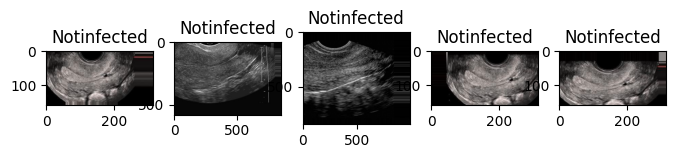

Infected Images
Shape of Pneumonia image img_0_3288.jpg - (320, 320, 3)
Shape of Pneumonia image img_0_5679.jpg - (216, 233, 3)
Shape of Pneumonia image img_0_75.jpg - (266, 299, 3)
Shape of Pneumonia image img_0_6680.jpg - (320, 320, 3)
Shape of Pneumonia image img_0_3352.jpg - (225, 225, 3)


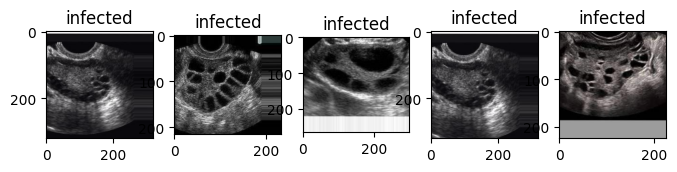

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
normal_images = np.random.choice(os.listdir(train_path_notinfected), 5, replace = False)
pneumonia_images = np.random.choice(os.listdir(train_path_infected), 5, replace = False)

print('Not infected Images')
fig, axes = plt.subplots(1,5, figsize = (8,8))
for i in range(len(normal_images)):
    plt.subplot(1,5, i+1)
    img = cv2.imread(os.path.join(train_path_notinfected, normal_images[i]))
    print(f'Shape of Normal image {normal_images[i]} - {img.shape}')
    plt.imshow(img, cmap = 'gray')
    plt.title('Notinfected')
plt.show()

#-------------------------------------------------------------------------

print('Infected Images')
fig, axes = plt.subplots(1,5, figsize = (8,8))
for i in range(len(pneumonia_images)):
    plt.subplot(1,5, i+1)
    img = cv2.imread(os.path.join(train_path_infected, pneumonia_images[i]))
    print(f'Shape of Pneumonia image {pneumonia_images[i]} - {img.shape}')
    plt.imshow(img, cmap = 'gray')
    plt.title('infected')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
def add_gaussian_noise(image):
    # Generate random Gaussian noise with mean 0 and standard deviation 0.1
    noise = np.random.normal(0, 0.1, image.shape)
    # Add the noise to the image
    noisy_image = image + noise
    # Clip pixel values to the range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

In [9]:
train_datagen = ImageDataGenerator(
    preprocessing_function=lambda img: add_gaussian_noise(img / 255.0),
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.20
    # Randomly flip images vertically
      # Randomly adjust brightness
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (244, 244),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training',
                                                 shuffle=True,
                                                 seed=69)

val = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (244, 244),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='validation',
                                                 shuffle=True,
                                                 seed=69)
test = test_datagen.flow_from_directory(directory = test_path,
                                            target_size = (244, 244),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False,
                                        
                                            seed = 69)

Found 1241 images belonging to 2 classes.
Found 309 images belonging to 2 classes.
Found 374 images belonging to 2 classes.


In [10]:
train_64 = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (244, 244),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training',
                                                 shuffle=True,
                                                 seed=69)

val_64= train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (244, 244),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='validation',
                                                 shuffle=True,
                                                 seed=69)
test_64 = test_datagen.flow_from_directory(directory = test_path,
                                            target_size = (244, 244),
                                            batch_size = 64,
                                            class_mode = 'binary',
                                            shuffle = False,
                                        
                                            seed = 69)

Found 1241 images belonging to 2 classes.
Found 309 images belonging to 2 classes.
Found 374 images belonging to 2 classes.


In [ ]:
count_train_notinfected = len(os.listdir(train_path_notinfected))
count_train_infected = len(os.listdir(train_path_infected))
count_train_total = count_train_normal + count_train_pneumonia


print('Number of images in train and test data')
print(f"Number of images in train normal data - {count_train_notinfected}")
print(f"Number of images in train pneumonia data - {count_train_infected}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_augmented_images(image_gen, num_images=25):
    # Get a sample batch from the generator
    images, labels = next(image_gen)
    
    # Get class indices
    test_dict = image_gen.class_indices
    classes = list(test_dict.keys())
    
    plt.figure(figsize=(20, 20))
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        
        # Scale images between 0 and 1
        image = images[i]
        
        # Convert image back to original scale (undo preprocessing)
        augmented_image = image   # Assuming preprocessing involved scaling to [-1, 1]
        
        plt.imshow(augmented_image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')
    
    plt.show()

# Display augmented images from the train generator
show_augmented_images(training_set)


In [ ]:
# import tensorflow as tf

# class StopTrainingCallback(tf.keras.callbacks.Callback):
#     def __init__(self, target_accuracy=0.99):
#         super(StopTrainingCallback, self).__init__()
#         self.target_ = target_accuracy
#         self.highest_val_accuracy = 0

#     def on_epoch_end(self, epoch, logs=None):
#         if logs.get('val_accuracy') is not None:
#             current_val_accuracy = logs.get('val_accuracy')
#             if current_val_accuracy > self.highest_val_accuracy:
#                 self.highest_val_accuracy = current_val_accuracy

#             print(f"\nEpoch {epoch + 1}/{self.params['epochs']}, "
#                   f"Validation Accuracy: {current_val_accuracy:.4f}, "
#                   f"Highest Validation Accuracy: {self.highest_val_accuracy:.4f}")

#             if current_val_accuracy >= self.target_accuracy:
#                 print(f"Reached {self.target_accuracy * 100:.2f}% validation accuracy, stopping training.")
#                 self.model.stop_training = True

# # Assuming 'model' is your Keras model and 'train' and 'val' are your training and validation data


In [15]:
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=10,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  

In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

reduce_lr_on_plateau_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)



In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow.keras.backend as K

def warmup_cosine_scheduler(epoch, lr):
    if epoch < WARMUP_EPOCHS:
        return lr * (epoch + 1) / WARMUP_EPOCHS
    else:
        return (LR_MIN + 0.5 * (LR_MAX - LR_MIN) * (1 + np.cos((epoch - WARMUP_EPOCHS) / (NUM_EPOCHS - WARMUP_EPOCHS) * np.pi)))

# Define parameters
WARMUP_EPOCHS = 5
NUM_EPOCHS = 20
LR_MIN = 1e-6
LR_MAX = 1e-3

# Create learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(warmup_cosine_scheduler)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

# Define a custom learning rate scheduler


# Define a Sequential model
custom_cnn = Sequential()

# Add Convolutional layers with kernel regularization and adaptive gradient clipping
custom_cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(244, 244, 3)))
custom_cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
custom_cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
custom_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
custom_cnn.add(Flatten())

# Add Dense layers with kernel regularization
custom_cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
custom_cnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
custom_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False, clipvalue=1.0)
custom_cnn.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Define callback for learning rate scheduling

# Print model summary
custom_cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 240, 240, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 238, 238, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1812608)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   232,013,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,115,521 (885.45 MB)

 Trainable params: 232,115,521 (885.45 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history4 = custom_cnn.fit(train, epochs=50, validation_data=val, verbose=1,callbacks=[early_stopping,reduce_lr_on_plateau_callback,lr_scheduler_callback])

Epoch 1/50


2024-03-28 08:38:33.599698: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,242,242]{3,2,1,0}, f32[32,64,240,240]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 08:38:34.693428: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.093971721s
Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,242,242]{3,2,1,0}, f32[32,64,240,240]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 08:38:37.518671: E external/local_xla/xla/service/sl

36/39 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step - accuracy: 0.6422 - loss: 5.3421

2024-03-28 08:39:57.711852: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,32,242,242]{3,2,1,0}, f32[25,64,240,240]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 08:39:58.456657: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.744886008s
Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,32,242,242]{3,2,1,0}, f32[25,64,240,240]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 08:40:01.032382: E external/local_xla/xla/service/sl

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6499 - loss: 5.2483 

W0000 00:00:1711615227.309195     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.6523 - loss: 5.2194 - val_accuracy: 0.8220 - val_loss: 2.9464 - learning_rate: 2.0000e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 797ms/step - accuracy: 0.8413 - loss: 2.8355 - val_accuracy: 0.8673 - val_loss: 2.5343 - learning_rate: 8.0000e-05
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 800ms/step - accuracy: 0.8704 - loss: 2.5099 - val_accuracy: 0.8770 - val_loss: 2.4041 - learning_rate: 4.8000e-05
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 796ms/step - accuracy: 0.8517 - loss: 2.3976 - val_accuracy: 0.8479 - val_loss: 2.3197 - learning_rate: 3.8400e-05
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 809ms/step - accuracy: 0.8738 - loss: 2.2755 - val_accuracy: 0.8706 - val_loss: 2.1899 - learning_rate: 3.8400e-05
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 891ms/step - accuracy: 0.7237 - loss: 2.8089 - val_accuracy: 0.8641 - val_loss: 1.6843 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 792ms/step - accuracy: 0.8392 - l

In [21]:
 custom_cnn.evaluate(test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7935 - loss: 0.7629 


[0.6186921000480652, 0.8903743028640747]

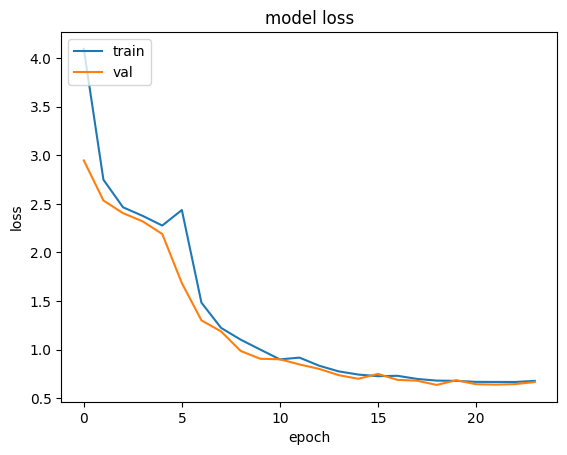

In [17]:
import matplotlib.pyplot as plt

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Save the plot as an image
plt.savefig('custom_cnn32.png')

# Show the plot
plt.show()


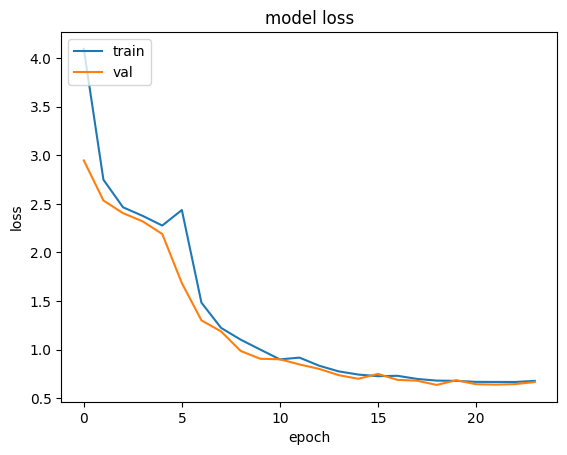

In [18]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
from keras.models import load_model

# Assuming your model is named 'model'
# Saving the model
custom_cnn.save('my_model.h5')

# To load the model later:
# loaded_model = load_model('my_model.h5')


# custom cnn batch 64

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

# Define a custom learning rate scheduler


# Define a Sequential model
custom_cnn64 = Sequential()

# Add Convolutional layers with kernel regularization and adaptive gradient clipping
custom_cnn64.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(244, 244, 3)))
custom_cnn64.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
custom_cnn64.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
custom_cnn64.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
custom_cnn64.add(Flatten())

# Add Dense layers with kernel regularization
custom_cnn64.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
custom_cnn64.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
custom_cnn64.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False, clipvalue=1.0)
custom_cnn64.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Define callback for learning rate scheduling

# Print model summary
custom_cnn64.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 240, 240, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 119, 119, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1812608)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │   232,013,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,115,521 (885.45 MB)

 Trainable params: 232,115,521 (885.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_customcnn64 = custom_cnn64.fit(train_64, epochs=30, validation_data=val_64, verbose=1,callbacks=[early_stopping,reduce_lr_on_plateau_callback,lr_scheduler_callback])

Epoch 1/30


2024-03-28 08:56:06.494642: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,242,242]{3,2,1,0}, f32[64,64,240,240]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 08:56:10.418991: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.924468658s
Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,242,242]{3,2,1,0}, f32[64,64,240,240]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 08:56:15.091670: E external/local_xla/xla/service/sl

20/20 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.6576 - loss: 5.1760 - val_accuracy: 0.8252 - val_loss: 3.4755 - learning_rate: 2.0000e-04
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8089 - loss: 3.3907 - val_accuracy: 0.8511 - val_loss: 3.0476 - learning_rate: 8.0000e-05
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8349 - loss: 3.0281 - val_accuracy: 0.8608 - val_loss: 2.8736 - learning_rate: 4.8000e-05
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8507 - loss: 2.8641 - val_accuracy: 0.8770 - val_loss: 2.7594 - learning_rate: 3.8400e-05
Epoch 5/30


In [24]:
custom_cnn64.evaluate(test_64)

6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.7414 - loss: 3.6582 


[3.4514598846435547, 0.8475936055183411]

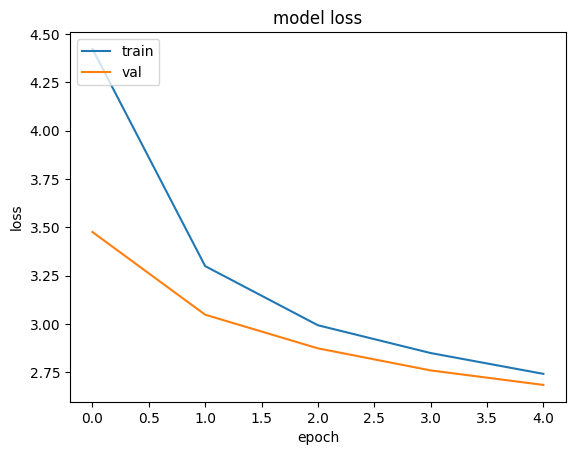

In [26]:
plt.plot(history_customcnn64.history['loss'])
plt.plot(history_customcnn64.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('custom_cnn64.png')
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# def build_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# def grad_cam(model, img_array, layer_name):
#     # Convert image to tensor
#     img_tensor = tf.convert_to_tensor(img_array)
#     img_tensor = tf.expand_dims(img_tensor, axis=0)

#     # Create a model that maps the input image to the activations of the target layer
#     activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

#     # Get the gradient of the predicted class with respect to the output feature map of the target layer
#     with tf.GradientTape() as tape:
#         conv_output = activation_model(img_tensor)
#         tape.watch(conv_output)
#         preds = model(img_tensor)
#         top_pred_index = tf.argmax(preds[0])
#         class_channel = preds[:, top_pred_index]

#     # Compute the gradient of the predicted class with respect to the output feature map
#     grads = tape.gradient(class_channel, conv_output)
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # Compute the weighted sum of the activations of the target layer
#     cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)
#     cam = tf.nn.relu(cam)

#     # Resize the CAM to match the original image size
#     cam = tf.image.resize(cam, (img_array.shape[1], img_array.shape[2]))

#     # Normalize the CAM
#     cam = cam - tf.reduce_min(cam)
#     cam = cam / tf.reduce_max(cam)
#     cam = cam.numpy()

#     return cam

# # Build the model
# custom = build_model()

# # Choose the layer you want to visualize
# layer_name = 'conv2d'  # Choose the name of the layer you want to visualize

# # Load and preprocess an example image
# img_path = '/kaggle/input/pcos-harish/pcosfinal/data/train/infected/img_0_1079.jpg'  # Path to your example image
# img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(244, 244))
# img_array = tf.keras.preprocessing.image.img_to_array(img_array)
# img_array = img_array / 255.0  # Normalize pixel values

# # Generate Grad-CAM
# cam = grad_cam(custom_c, img_array, layer_name)

# # Plot Grad-CAM
# plt.imshow(cam[0], cmap='jet', alpha=0.5)
# plt.imshow(img_array, alpha=0.5)
# plt.show()


# resnet custom architecrture(Adding more dtopout layers and batch normalizations) to reduce the process of overfittinh)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu', l2_strength=0.01):
    y = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same',
               kernel_regularizer=regularizers.l2(l2_strength))(x)
    y = BatchNormalization()(y)
    y = Activation(activation)(y)

    y = Conv2D(filters, kernel_size=kernel_size, strides=(1, 1), padding='same',
               kernel_regularizer=regularizers.l2(l2_strength))(y)
    y = BatchNormalization()(y)

    if strides != (1, 1) or x.shape[-1] != filters:
        x = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same',
                   kernel_regularizer=regularizers.l2(l2_strength))(x)
        x = BatchNormalization()(x)

    y = tf.keras.layers.add([x, y])
    y = Activation(activation)(y)
    return y

def ResNet(input_shape=(244, 244, 3), num_classes=2):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same',
               kernel_regularizer=regularizers.l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Assuming num_classes is defined

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define learning rate scheduler


# Create ResNet model
resnet_model = ResNet()

# Compile the model with Adam optimizer and clipping
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False, clipvalue=1.0)
resnet_model.compile(optimizer=opt,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define learning rate scheduler callback

# Print model summary
resnet_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 244, 244,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 122, 122,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 122, 122,  │        256 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 122, 122,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 61, 61,    │          0 │ activation_26[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 61, 61,    │     36,928 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 61, 61,    │     36,928 │ activation_27[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 61, 61,    │          0 │ max_pooling2d_2[… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_28       │ (None, 61, 61,    │          0 │ add_12[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 61, 61,    │     36,928 │ activation_28[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_29       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 61, 61,    │     36,928 │ activation_29[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_34[0][0] 

 Total params: 2,789,761 (10.64 MB)

 Trainable params: 2,785,281 (10.63 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [18]:
history_resnet_custom=resnet_model.fit(train, epochs=50, validation_data=val, verbose=1,callbacks=[early_stopping,reduce_lr_on_plateau_callback,lr_scheduler_callback])

Epoch 1/50
 1/39 ━━━━━━━━━━━━━━━━━━━━ 20:22 32s/step - accuracy: 0.4062 - loss: 19.2577

I0000 00:00:1711621750.383840     132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8374 - loss: 18.7094 - val_accuracy: 0.5890 - val_loss: 16.9131 - learning_rate: 2.0000e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 646ms/step - accuracy: 0.9718 - loss: 16.6471 - val_accuracy: 0.5890 - val_loss: 15.8430 - learning_rate: 8.0000e-05
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 638ms/step - accuracy: 0.9733 - loss: 15.6849 - val_accuracy: 0.5890 - val_loss: 15.2116 - learning_rate: 4.8000e-05
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 645ms/step - accuracy: 0.9925 - loss: 15.0866 - val_accuracy: 0.4110 - val_loss: 14.7138 - learning_rate: 3.8400e-05
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 638ms/step - accuracy: 0.9840 - loss: 14.5926 - val_accuracy: 0.4110 - val_loss: 14.2322 - learning_rate: 3.8400e-05
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 641ms/step - accuracy: 0.9252 - loss: 12.1779 - val_accuracy: 0.5210 - val_loss: 8.4286 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 651ms/step - accuracy: 

In [19]:
resnet_model.fit(test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5156 - loss: 4.3702


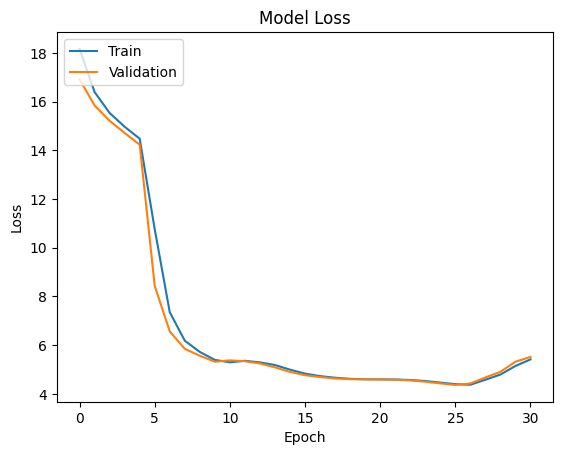

In [20]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history_resnet_custom.history['loss'])
plt.plot(history_resnet_custom.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image
plt.savefig('resnet_custom.png')

# Show the plot
plt.show()


# resnet model with batch suze 64

In [20]:
def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu', l2_strength=0.01):
    y = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same',
               kernel_regularizer=regularizers.l2(l2_strength))(x)
    y = BatchNormalization()(y)
    y = Activation(activation)(y)

    y = Conv2D(filters, kernel_size=kernel_size, strides=(1, 1), padding='same',
               kernel_regularizer=regularizers.l2(l2_strength))(y)
    y = BatchNormalization()(y)

    if strides != (1, 1) or x.shape[-1] != filters:
        x = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same',
                   kernel_regularizer=regularizers.l2(l2_strength))(x)
        x = BatchNormalization()(x)

    y = tf.keras.layers.add([x, y])
    y = Activation(activation)(y)
    return y

def ResNet(input_shape=(244, 244, 3), num_classes=2):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same',
               kernel_regularizer=regularizers.l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Assuming num_classes is defined

    model = Model(inputs=inputs, outputs=outputs)
    return model
resnet_model64 = ResNet()


In [21]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False, clipvalue=1.0)
resnet_model64.compile(optimizer=opt,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define learning rate scheduler callback

# Print model summary

In [22]:
history_resnet_model64=resnet_model64.fit(train_64, epochs=50, validation_data=val_64, verbose=1,callbacks=[early_stopping,reduce_lr_on_plateau_callback,lr_scheduler_callback])

Epoch 1/50


I0000 00:00:1711633349.988966     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.7946 - loss: 18.9333 - val_accuracy: 0.6084 - val_loss: 17.9601 - learning_rate: 2.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9699 - loss: 17.8130 - val_accuracy: 0.4110 - val_loss: 17.3435 - learning_rate: 8.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9847 - loss: 17.2448 - val_accuracy: 0.4110 - val_loss: 16.9424 - learning_rate: 4.8000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9867 - loss: 16.8608 - val_accuracy: 0.4110 - val_loss: 16.6158 - learning_rate: 3.8400e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9971 - loss: 16.5347 - val_accuracy: 0.4110 - val_loss: 16.2894 - learning_rate: 3.8400e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9357 - loss: 14.5996 - val_accuracy: 0.4110 - val_loss: 10.8826 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9290 - loss: 1

In [23]:
resnet_model.evaluate(test_64)

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3550 - loss: 19.2526


[19.25262451171875, 0.6176470518112183]

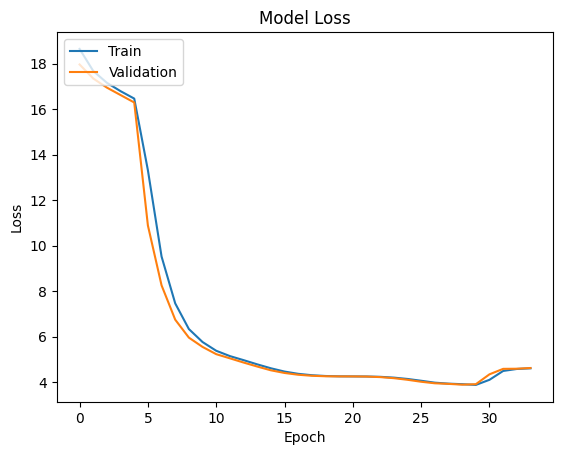

In [25]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history_resnet_model64.history['loss'])
plt.plot(history_resnet_model64.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image
plt.savefig('resnet_custom64.png')

# Show the plot
plt.show()


# resizig the image to 224,224,3

In [31]:
train224 = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training',
                                                 shuffle=True,
                                                 seed=69)

val224= train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='validation',
                                                 shuffle=True,
                                                 seed=69)
test224 = test_datagen.flow_from_directory(directory = test_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'binary',
                                            shuffle = False,
                                        
                                            seed = 69)

Found 1241 images belonging to 2 classes.
Found 309 images belonging to 2 classes.
Found 374 images belonging to 2 classes.


# resnet 50 imagenet model with batch size 32

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pathlib





# Define the image size and batch size




# Plot some sample images from the dataset




# Create the ResNet50 model and set the layers to be non-trainable
resnet_model_imagenet32 = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(244, 244, 3),
                                                  pooling='avg',
                                                  weights='/kaggle/input/resnet-50-weights-varma/resnet50_weights_tf_dim_ordering_tf_kernels_notop (1).h5')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model_imagenet32.add(pretrained_model)


kernel_regularizer = regularizers.l2(0.01)  # Adjust regularization strength as needed

resnet_model_imagenet32.add(Dense(512, activation='relu', kernel_regularizer=kernel_regularizer))
resnet_model_imagenet32.add(BatchNormalization())
resnet_model_imagenet32.add(Dropout(0.5))
resnet_model_imagenet32.add(Dense(256, activation='relu', kernel_regularizer=kernel_regularizer))
resnet_model_imagenet32.add(BatchNormalization())
resnet_model_imagenet32.add(Dropout(0.5))
resnet_model_imagenet32.add(Dense(1, activation='sigmoid', kernel_regularizer=kernel_regularizer))  # Assuming binary classification



# Add fully connected layers for classification



opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False, clipvalue=1.0)

# Compile and train the model
resnet_model_imagenet32.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [52]:
resnet_model_imagenet32.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [53]:
from tensorflow.keras.utils import plot_model

plot_model(resnet_model_imagenet32, to_file='resnet50_modified.png', show_shapes=True, show_layer_names=True)


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [54]:
history_resnet50_model32=resnet_model_imagenet32.fit(train, epochs=50, validation_data=val, verbose=1,callbacks=[early_stopping,reduce_lr_on_plateau_callback,lr_scheduler_callback])

Epoch 1/50
 1/39 ━━━━━━━━━━━━━━━━━━━━ 12:43 20s/step - accuracy: 0.5000 - loss: 12.7486

W0000 00:00:1711637794.563787     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/39 ━━━━━━━━━━━━━━━━━━━━ 9s 878ms/step - accuracy: 0.7241 - loss: 11.7210 

W0000 00:00:1711637818.165184     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.7518 - loss: 11.4470

W0000 00:00:1711637826.335872     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711637833.479577     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7538 - loss: 11.4245 - val_accuracy: 0.4434 - val_loss: 9.3863 - learning_rate: 2.0000e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 717ms/step - accuracy: 0.8983 - loss: 8.7481 - val_accuracy: 0.4110 - val_loss: 8.5165 - learning_rate: 8.0000e-05
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 33s 718ms/step - accuracy: 0.9136 - loss: 7.9519 - val_accuracy: 0.4369 - val_loss: 7.9886 - learning_rate: 4.8000e-05
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 715ms/step - accuracy: 0.9154 - loss: 7.4710 - val_accuracy: 0.6570 - val_loss: 7.5479 - learning_rate: 3.8400e-05
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 33s 717ms/step - accuracy: 0.9374 - loss: 7.0941 - val_accuracy: 0.8511 - val_loss: 7.1381 - learning_rate: 3.8400e-05
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 33s 728ms/step - accuracy: 0.9319 - loss: 5.3745 - val_accuracy: 0.5890 - val_loss: 4.2936 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 34s 746ms/step - accuracy: 0.9493 - l

In [55]:
resnet_model_imagenet32.evaluate(test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.9772 - loss: 0.5725


W0000 00:00:1711638852.802506     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.553114652633667, 0.9893048405647278]

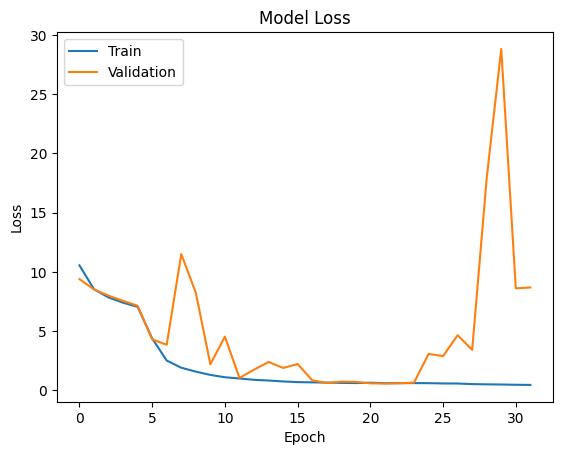

In [56]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history_resnet50_model32.history['loss'])
plt.plot(history_resnet50_model32.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image
plt.savefig('resnet50_batch32.png')

# Show the plot
plt.show()


# resnet imagenet batch size 64

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pathlib





# Define the image size and batch size




# Plot some sample images from the dataset




# Create the ResNet50 model and set the layers to be non-trainable
resnet_model_imagenet64 = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(244, 244, 3),
                                                  pooling='avg',
                                                  weights='/kaggle/input/resnet-50-weights-varma/resnet50_weights_tf_dim_ordering_tf_kernels_notop (1).h5')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model_imagenet64.add(pretrained_model)


kernel_regularizer = regularizers.l2(0.05)  # Adjust regularization strength as needed

resnet_model_imagenet64.add(Dense(512, activation='relu', kernel_regularizer=kernel_regularizer))
resnet_model_imagenet64.add(BatchNormalization())
resnet_model_imagenet64.add(Dropout(0.7))
resnet_model_imagenet64.add(Dense(256, activation='relu', kernel_regularizer=kernel_regularizer))
resnet_model_imagenet64.add(BatchNormalization())
resnet_model_imagenet64.add(Dropout(0.7))
resnet_model_imagenet64.add(Dense(64, activation='relu', kernel_regularizer=kernel_regularizer))
resnet_model_imagenet64.add(BatchNormalization())
resnet_model_imagenet64.add(Dropout(0.7))
resnet_model_imagenet64.add(Dense(1, activation='sigmoid', kernel_regularizer=kernel_regularizer))  # Assuming binary classification



# Add fully connected layers for classification



opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False, clipvalue=0.7)

# Compile and train the model
resnet_model_imagenet64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
history_resnet50_model64=resnet_model_imagenet64.fit(train_64, epochs=50, validation_data=val_64, verbose=1,callbacks=[early_stopping,reduce_lr_on_plateau_callback,lr_scheduler_callback])

Epoch 1/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 12:14 39s/step - accuracy: 0.5625 - loss: 64.3809

W0000 00:00:1711639173.048077     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/20 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.5163 - loss: 63.9171   

W0000 00:00:1711639186.093789     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5170 - loss: 62.0759

W0000 00:00:1711639202.968107     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711639217.947013     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5181 - loss: 61.9682 - val_accuracy: 0.4110 - val_loss: 54.8807 - learning_rate: 2.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6023 - loss: 54.2850 - val_accuracy: 0.4110 - val_loss: 51.7120 - learning_rate: 8.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6655 - loss: 51.3298 - val_accuracy: 0.4110 - val_loss: 49.9181 - learning_rate: 4.8000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6775 - loss: 49.4830 - val_accuracy: 0.4110 - val_loss: 48.5063 - learning_rate: 3.8400e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6710 - loss: 48.1265 - val_accuracy: 0.4110 - val_loss: 47.1421 - learning_rate: 3.8400e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7635 - loss: 39.6610 - val_accuracy: 0.4110 - val_loss: 24.0573 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8555 - loss: 20

In [60]:
resnet_model_imagenet64.evaluate(test_64)

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6450 - loss: 54.8260


W0000 00:00:1711639536.380908     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[54.892696380615234, 0.38235294818878174]

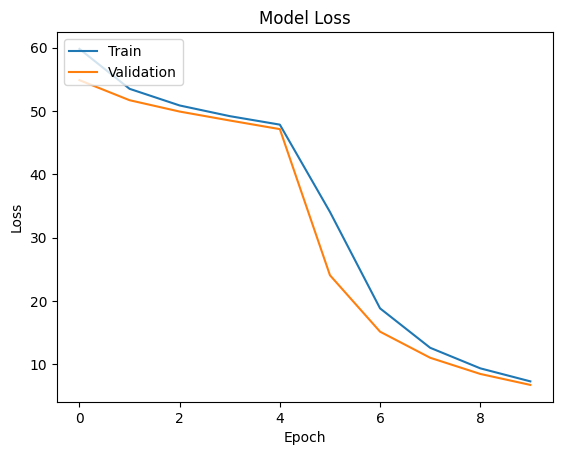

In [61]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history_resnet50_model64.history['loss'])
plt.plot(history_resnet50_model64.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image
plt.savefig('resnet50_batch64.png')

# Show the plot
plt.show()


# custom vgg16 batch size 64

In [25]:
from tensorflow import keras

# Define a function to create a VGG block with global pooling
def vgg_block(x, filters, num_conv):
    for _ in range(num_conv):
        x = keras.layers.Conv2D(filters, 3, padding="same", activation="relu",
                                kernel_regularizer=keras.regularizers.l2(0.01))(x)
        x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization
    # Apply GlobalAveragePooling2D
    x = keras.layers.GlobalAveragePooling2D()(x)
    # Reshape to add spatial dimensions back
    x = keras.layers.Reshape((1, 1, filters))(x)
    return x

# Define the VGG16 model with global pooling
def vgg16_global_pooling(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Block 1
    x = vgg_block(inputs, 64, 2)

    # Blocks 2-5 with global pooling
    x = vgg_block(x, 128, 2)
    x = vgg_block(x, 256, 3)
    x = vgg_block(x, 512, 3)
    x = vgg_block(x, 512, 3)

    # Flatten and fully connected layers (same as original VGG16)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu", 
                           kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(512, activation="relu", 
                           kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(256, activation="relu", 
                           kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name='vgg16_custom')
    return model


# Set hyperparameters (adjust as needed)
# epochs = 10
# learning_rate = 0.001

# Load your data (replace with your data paths)

# Build the model
vgg16_custom_model64 = vgg16_global_pooling((244, 244, 3))

# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# # Train the model
# model.fit(train, epochs=epochs, validation_data=val)

# # Save the model (optional)
# model.save('vgg16_global_pooling.h5')

In [21]:
opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False,clipvalue=1.0)

vgg16_custom_model64.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [22]:
history_vgg16_64 = vgg16_custom_model64.fit(train_64, epochs=50, validation_data=val_64,callbacks=[lr_scheduler_callback,reduce_lr_on_plateau_callback,early_stopping])

Epoch 1/50


2024-03-28 15:57:05.659844: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,64,244,244]{3,2,1,0}, f32[25,64,244,244]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 15:57:08.719447: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.059698816s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,64,244,244]{3,2,1,0}, f32[25,64,244,244]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 15:57:12.642355: E external/

 1/20 ━━━━━━━━━━━━━━━━━━━━ 20:10 64s/step - accuracy: 0.6000 - loss: 56.4974

I0000 00:00:1711641443.804216      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711641443.836714      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-03-28 15:58:06.587004: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,244,244]{3,2,1,0}, f32[64,64,244,244]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-28 15:58:17.000937: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 11.414110919s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,244,244]{3,2,1,0}, f32[64,64,244,244]{3,2

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5917 - loss: 53.1274

W0000 00:00:1711641547.310946      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 188s 7s/step - accuracy: 0.5935 - loss: 52.9745 - val_accuracy: 0.5890 - val_loss: 43.4923 - learning_rate: 2.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8243 - loss: 42.1472 - val_accuracy: 0.5890 - val_loss: 39.4796 - learning_rate: 8.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8969 - loss: 38.5122 - val_accuracy: 0.5890 - val_loss: 37.3377 - learning_rate: 4.8000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9373 - loss: 36.4498 - val_accuracy: 0.5890 - val_loss: 35.7402 - learning_rate: 3.8400e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9308 - loss: 34.8724 - val_accuracy: 0.5890 - val_loss: 34.2347 - learning_rate: 3.8400e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9085 - loss: 27.2437 - val_accuracy: 0.5890 - val_loss: 16.9964 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9364 - loss: 1

In [23]:
vgg16_custom_model64.evaluate(test_64)

6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.3550 - loss: 4.3902 


[2.990487813949585, 0.6176470518112183]

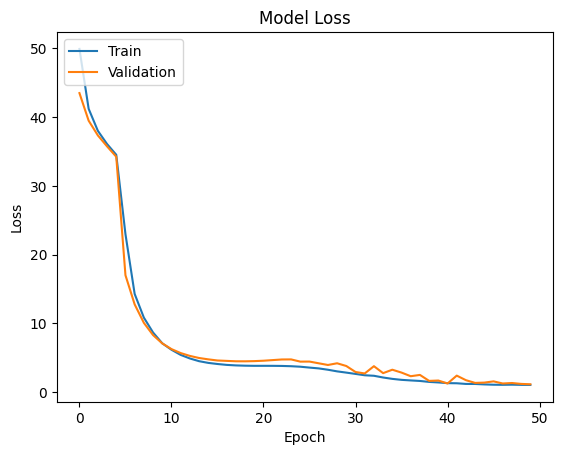

In [24]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history_vgg16_64.history['loss'])
plt.plot(history_vgg16_64.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image
plt.savefig('vgg16_batch64.png')

# Show the plot
plt.show()


# custom vgg19 batch 64

In [29]:
from tensorflow import keras

# Define a function to create a VGG block with global pooling
def vgg_block(x, filters, num_conv):
    for _ in range(num_conv):
        x = keras.layers.Conv2D(filters, 3, padding="same", activation="relu",
                                kernel_regularizer=keras.regularizers.l2(0.01))(x)
        x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization
    # Apply MaxPooling2D
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    return x

# Define the VGG19 model with global pooling
def vgg19_global_pooling(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Block 1
    x = vgg_block(inputs, 64, 2)

    # Block 2
    x = vgg_block(x, 128, 2)

    # Block 3
    x = vgg_block(x, 256, 4)

    # Block 4
    x = vgg_block(x, 512, 4)

    # Block 5
    x = vgg_block(x, 512, 4)

    # Flatten and fully connected layers
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu", 
                           kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(512, activation="relu", 
                           kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(256, activation="relu", 
                           kernel_regularizer=keras.regularizers.l2(0.01))(x)
    x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)  # Adjust num_classes as needed

    model = keras.Model(inputs=inputs, outputs=outputs, name='vgg19_custom')
    return model


# Set hyperparameters (adjust as needed)
# epochs = 10

# Load your data (replace with your data paths)

# Build the model
vgg19_custom_model = vgg19_global_pooling((244, 244, 3))

# Compile the model with SGD optimizer and gradient clipping

In [30]:
opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False,clipvalue=1.0)

vgg19_custom_model.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [31]:
history_vgg19_64 = vgg19_custom_model.fit(train_64, epochs=50, validation_data=val_64,callbacks=[lr_scheduler_callback,reduce_lr_on_plateau_callback,early_stopping])

Epoch 1/50


W0000 00:00:1711643614.238775      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 4/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4935 - loss: 82.3252  

W0000 00:00:1711643689.035307      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6557 - loss: 81.8634

W0000 00:00:1711643715.879537      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711643765.434603      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 315s 8s/step - accuracy: 0.6615 - loss: 81.8400 - val_accuracy: 0.5890 - val_loss: 80.8965 - learning_rate: 2.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9507 - loss: 80.1137 - val_accuracy: 0.5890 - val_loss: 80.0198 - learning_rate: 8.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9712 - loss: 79.1926 - val_accuracy: 0.5890 - val_loss: 79.4369 - learning_rate: 4.8000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9831 - loss: 78.5235 - val_accuracy: 0.5890 - val_loss: 78.9805 - learning_rate: 3.8400e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9908 - loss: 77.8930 - val_accuracy: 0.5890 - val_loss: 78.4316 - learning_rate: 3.8400e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9926 - loss: 73.5543 - val_accuracy: 0.5890 - val_loss: 65.3729 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9863 - loss: 6

In [32]:
vgg19_custom_model.evaluate(test_64)

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.2499 - loss: 81.2684  

W0000 00:00:1711644237.708331      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 9s/step - accuracy: 0.3550 - loss: 81.1507


[80.85637664794922, 0.6176470518112183]

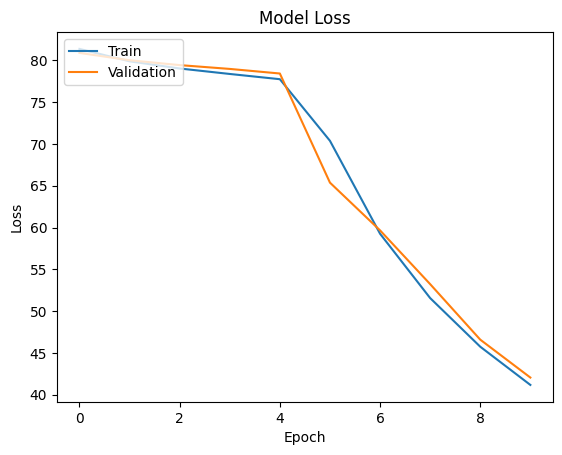

In [33]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history_vgg19_64.history['loss'])
plt.plot(history_vgg19_64.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image
plt.savefig('vgg19_batch64.png')

# Show the plot
plt.show()


# just trying the image segmentation technique

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def unet(input_shape=(None, None, 1)):
    # Encoder
    inputs = Input(input_shape)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
   # Decoder
    # Decoder
   # Decoder
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='valid')(drop5)
    up6 = concatenate([up6, drop4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='valid')(conv6)
    # Adjust the size of up7 to match conv3
    crop_size = (conv3.shape[1] - up7.shape[1]) // 2, (conv3.shape[2] - up7.shape[2]) // 2
    up7_cropped = up7[:, crop_size[0]:up7.shape[1] + crop_size[0], crop_size[1]:up7.shape[2] + crop_size[1], :]  # Crop the excess pixels
    up7 = concatenate([up7_cropped, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)



    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='valid')(conv7)
    up8 = concatenate([up8[:, :-1, :-1, :], conv2], axis=3)  # Adjust size of up8 to match conv2
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='valid')(conv8)
    up9 = concatenate([up9[:, :-1, :-1, :], conv1], axis=3)  # Adjust size of up9 to match conv1
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the U-Net model
image_model = unet(input_shape=(244, 244, 3))

# Compile the model
image_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
image_model.summary()


ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 60, 60, 256), (None, 61, 61, 256)]